In [10]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

#Import the Dataset
df = pd.read_csv('/Users/shambhavikhanna/Downloads/amazon_products_sales_data.csv')


In [42]:
df.head()

,product_name,product_ratings,total_reviews,last_month_picks,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,price_bin
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,0.0,0.0,Save 15% with coupon,Add to cart,9/1/25,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,8/21/25 11:14,Phones,43.60,0-500
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,0.0,0.0,No Coupon,Add to cart,8/29/25,Unknown,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,8/21/25 11:14,Laptops,37.52,0-500
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,0.0,0.0,No Coupon,Add to cart,9/1/25,Unknown,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,8/21/25 11:14,Laptops,10.03,0-500
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,0.0,0.0,No Coupon,Unknown,Unknown,Unknown,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,8/21/25 11:14,Phones,0.00,0-500
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,0.0,0.0,No Coupon,Unknown,Unknown,Unknown,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,8/21/25 11:14,Phones,0.00,0-500


In [43]:
print("\nData Shape:", df.shape)
print("\nData Info:\n")
df.info()



Data Shape: (41649, 18)

Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 41649 entries, 0 to 42675
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   product_name          41649 non-null  object  
 1   product_ratings       41649 non-null  float64 
 2   total_reviews         41649 non-null  float64 
 3   last_month_picks      41649 non-null  float64 
 4   discounted_price      41649 non-null  float64 
 5   original_price        41649 non-null  float64 
 6   is_best_seller        41649 non-null  float64 
 7   is_sponsored          41649 non-null  float64 
 8   has_coupon            41649 non-null  object  
 9   buy_box_availability  41649 non-null  object  
 10  delivery_date         41649 non-null  object  
 11  sustainability_tags   41649 non-null  object  
 12  product_image_url     41649 non-null  object  
 13  product_page_url      41649 non-null  object  
 14  data_collected_at    

In [40]:
print("\nData Description:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()


Data Description:
        product_ratings  total_reviews  last_month_picks  discounted_price  \
count     41649.000000   41649.000000      41649.000000      41649.000000   
mean          4.282850    2957.082259        669.589906        236.768303   
std           0.780334   12935.290297       3974.257535        469.157462   
min           0.000000       0.000000          0.000000          0.000000   
25%           4.200000      73.000000          0.000000         25.990000   
50%           4.500000     328.000000        100.000000         79.990000   
75%           4.600000    1709.000000        300.000000        219.000000   
max           5.000000  865598.000000     100000.000000       5449.000000   

       original_price  is_best_seller  is_sponsored  discount_percentage  
count    41649.000000         41649.0       41649.0         41649.000000  
mean       250.769526             0.0           0.0             6.252767  
std        492.268098             0.0           0.0          

In [46]:
#Rename columns for better understanding
df = df.rename(columns={
    'title': 'product_name',
    'rating': 'product_ratings',
    'reviews': 'total_reviews',
    'purchased_last_month': 'last_month_picks'
})
df.columns

Index(['product_name', 'product_ratings', 'total_reviews', 'last_month_picks',
       'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored',
       'has_coupon', 'buy_box_availability', 'delivery_date',
       'sustainability_tags', 'product_image_url', 'product_page_url',
       'data_collected_at', 'product_category', 'discount_percentage',
       'price_bin', 'discount_amount', 'reviews_per_rating'],
      dtype='object')

In [13]:
#Clean the Data
# Convert numeric columns and remove symbols
numeric_cols = ['product_ratings','total_reviews','discounted_price',
                'original_price','discount_percentage','is_sponsored','last_month_picks']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaNs
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill categorical NaNs
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Convert target for classification
df['is_best_seller'] = df['is_best_seller'].map({True:1, False:0}).fillna(0)

print("\nRows after cleaning:", df.shape[0])



Rows after cleaning: 41712


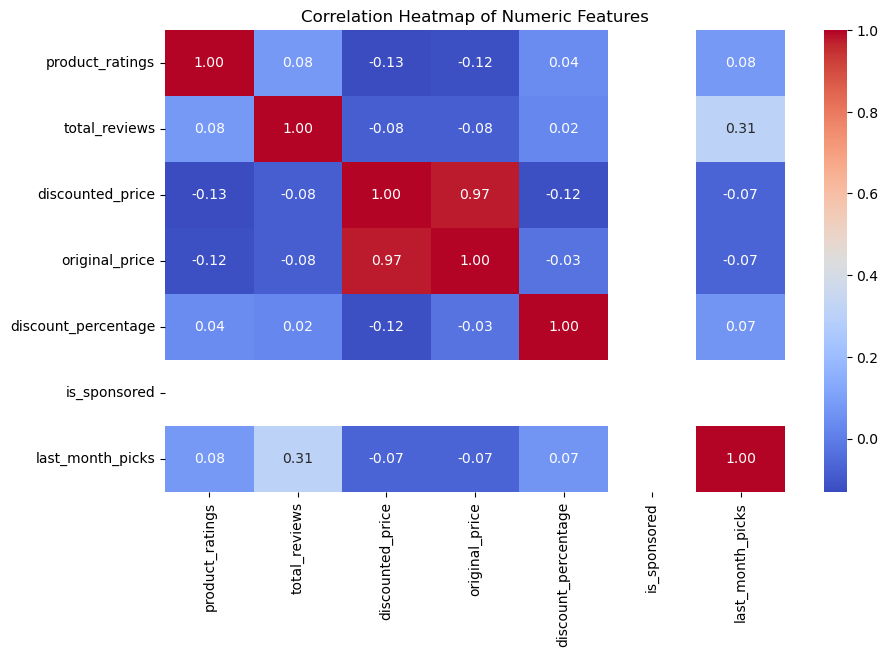

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [45]:
#Discount amount
df['discount_amount'] = df['original_price'] - df['discounted_price']
print("\nTop 5 discount amounts:\n", df[['product_name','discount_amount']].sort_values(by='discount_amount', ascending=False).head())
#Reviews per rating (to see if more reviews correlate with higher ratings)
df['reviews_per_rating'] = df['total_reviews'] / (df['product_ratings'] + 0.1)
print("\nTop 5 reviews per rating:\n", df[['product_name','reviews_per_rating']].sort_values(by='reviews_per_rating', ascending=False).head())


Top 5 discount amounts:
                                             product_name  discount_amount
35487  Dell Inspiron 15 3535 Touchscreen Laptop Compu...          2200.00
35614  Lenovo IdeaPad Slim 3 Laptop Computer for Home...          2199.01
35833  Lenovo IdeaPad Slim 3 Laptop Computer for Home...          2199.01
36140  Lenovo IdeaPad Slim 3 Laptop Computer for Home...          2199.01
36116  Lenovo IdeaPad Slim 3 Laptop Computer for Home...          2199.01

Top 5 reviews per rating:
                                            product_name  reviews_per_rating
10    Amazon Basics 48-Pack AA Alkaline High-Perform...       180332.916667
8566  SanDisk 32GB Ultra microSDHC UHS-I Memory Card...       134462.083333
8910  [Older Version] SanDisk 32GB 2-Pack Ultra Micr...       134461.666667
17    Amazon Basics AAA Alkaline High-Performance Ba...       130370.000000
696   Amazon Basics HDMI Cable, 3ft, 4K@60Hz, High-S...       115401.458333


In [15]:
#Apply Filters and Grouping

#High-rated products (>4.5) with more than 100 reviews
high_rated = df[(df["product_ratings"] >= 4.5) & (df["total_reviews"] > 100)]
print("\nHigh-rated products:\n", high_rated[['product_name','product_ratings','total_reviews']].head())

#Average discount per category
avg_discount = df.groupby("product_category")["discount_percentage"].mean().sort_values(ascending=False)
print("\nAverage discount per category:\n", avg_discount.head())

#Average product rating per category
avg_rating_per_category = df.groupby("product_category")["product_ratings"].mean().sort_values(ascending=False)
print(avg_rating_per_category)

#Best seller count per category
bestseller_counts = df.groupby("product_category")["is_best_seller"].sum().sort_values(ascending=False)
print("\nNumber of bestsellers per category:\n", bestseller_counts.head())

# Top 10 best-selling products (by last month picks)
top_sellers = df.sort_values("last_month_picks", ascending=False).head(10)
print("\nTop 10 Best-Selling Products:\n", top_sellers[['product_name','last_month_picks']])


High-rated products:
                                         product_name  product_ratings  \
0  BOYA BOYALINK 2 Wireless Lavalier Microphone f...              4.6   
2  DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...              4.6   
3  Apple AirPods Pro 2 Wireless Earbuds, Active N...              4.6   
4  Apple AirTag 4 Pack. Keep Track of and find Yo...              4.8   
5  Texas Instruments TI-84 Plus CE Color Graphing...              4.6   

   total_reviews  
0          375.0  
2         3044.0  
3        35882.0  
4        28988.0  
5        44522.0  

Average discount per category:
 product_category
Headphones             13.798385
Chargers & Cables      12.619465
Storage                11.621773
Networking             11.030009
Printers & Scanners     9.187275
Name: discount_percentage, dtype: float64
product_category
Power & Batteries      4.540652
Speakers               4.499554
Cameras                4.491569
TV & Display           4.473346
Smart Home            

--- Linear Regression for Ratings ---
MSE: 0.590353643752228
R2 Score: 0.014899009660934937


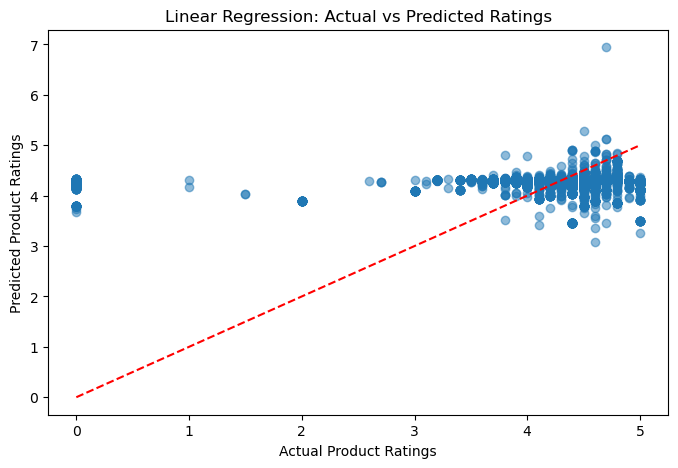

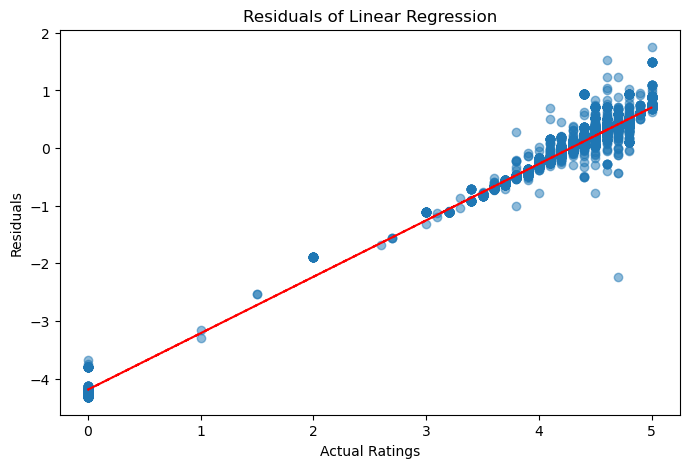

--- Decision Tree Regressor for Total Reviews ---
MSE: 133127476.21703288
R2 Score: 0.09714894014256326


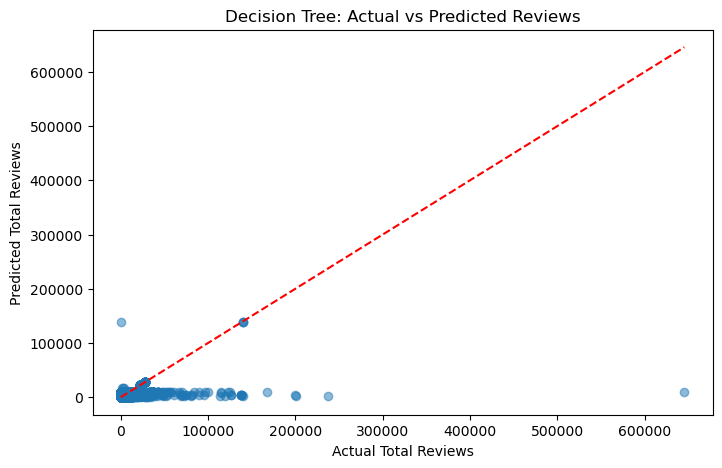

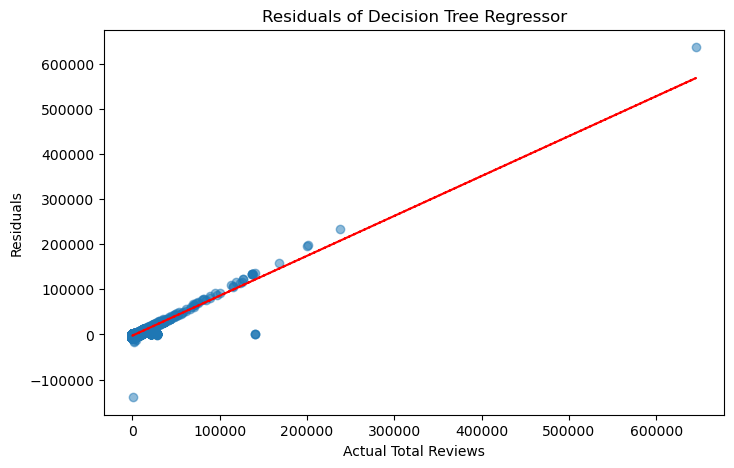

In [ ]:
# ---- Linear Regression ----
X = df[['total_reviews','discounted_price','original_price','discount_percentage','is_sponsored']]
y = df['product_ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rating_model = LinearRegression()
rating_model.fit(X_train, y_train)

y_pred_lr = rating_model.predict(X_test)

print("--- Linear Regression for Ratings ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Prediction vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Product Ratings")
plt.ylabel("Predicted Product Ratings")
plt.title("Linear Regression: Actual vs Predicted Ratings")
plt.show()

# Residual Plot
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8,5))
plt.scatter(y_test, residuals_lr, alpha=0.5)

# Fit straight line with numpy
z = np.polyfit(y_test, residuals_lr, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")

plt.xlabel("Actual Ratings")
plt.ylabel("Residuals")
plt.title("Residuals of Linear Regression")
plt.show()


# ---- Decision Tree ----
X = df[['product_ratings','discounted_price','original_price','discount_percentage','is_sponsored']]
y = df['total_reviews']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("--- Decision Tree Regressor for Total Reviews ---")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2 Score:", r2_score(y_test, y_pred_tree))

# Prediction vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Total Reviews")
plt.ylabel("Predicted Total Reviews")
plt.title("Decision Tree: Actual vs Predicted Reviews")
plt.show()

# Residual Plot
residuals_tree = y_test - y_pred_tree
plt.figure(figsize=(8,5))
plt.scatter(y_test, residuals_tree, alpha=0.5)

# Fit straight line with numpy
z = np.polyfit(y_test, residuals_tree, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")

plt.xlabel("Actual Total Reviews")
plt.ylabel("Residuals")
plt.title("Residuals of Decision Tree")
plt.show()

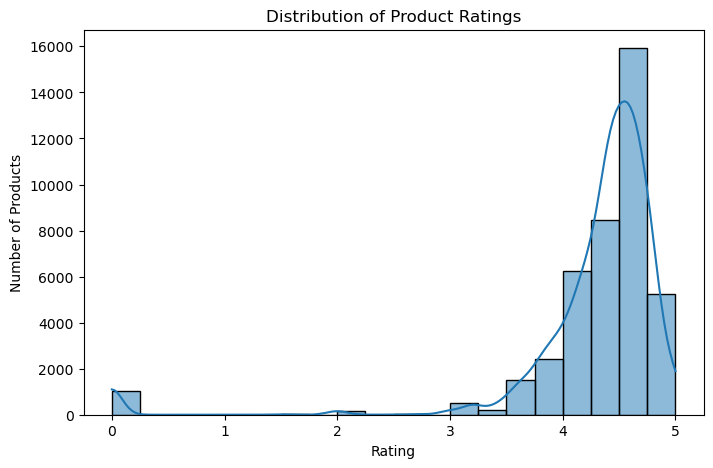

In [21]:
#Distribution of product ratings 
plt.figure(figsize=(8,5))
sns.histplot(df['product_ratings'], bins=20, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

/var/folders/gq/glzjr1bd5vq23xf6yptyc8wc0000gn/T/ipykernel_15386/2117948373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_bin', y='product_ratings', data=df, palette="Set2")


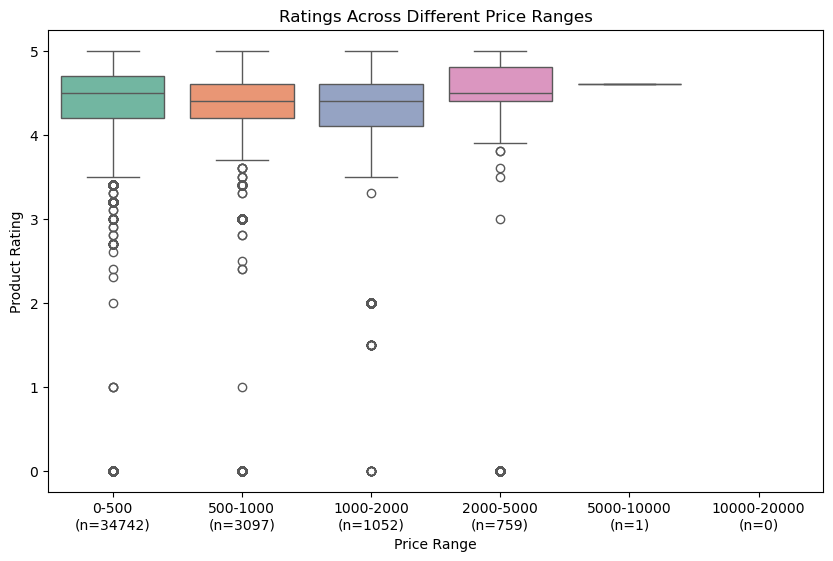

In [31]:
df['price_bin'] = pd.cut(df['discounted_price'], bins=[0,500,1000,2000,5000,10000,20000], labels=["0-500","500-1000","1000-2000","2000-5000","5000-10000","10000-20000"])

plt.figure(figsize=(10,6))
sns.boxplot(x='price_bin', y='product_ratings', data=df, palette="Set2")

# Add counts to x-axis labels
counts = df['price_bin'].value_counts().reindex(["0-500","500-1000","1000-2000","2000-5000","5000-10000","10000-20000"])
plt.xticks(range(len(counts)), [f"{cat}\n(n={counts[cat]})" for cat in counts.index])

plt.xlabel("Price Range")
plt.ylabel("Product Rating")
plt.title("Ratings Across Different Price Ranges")
plt.show()

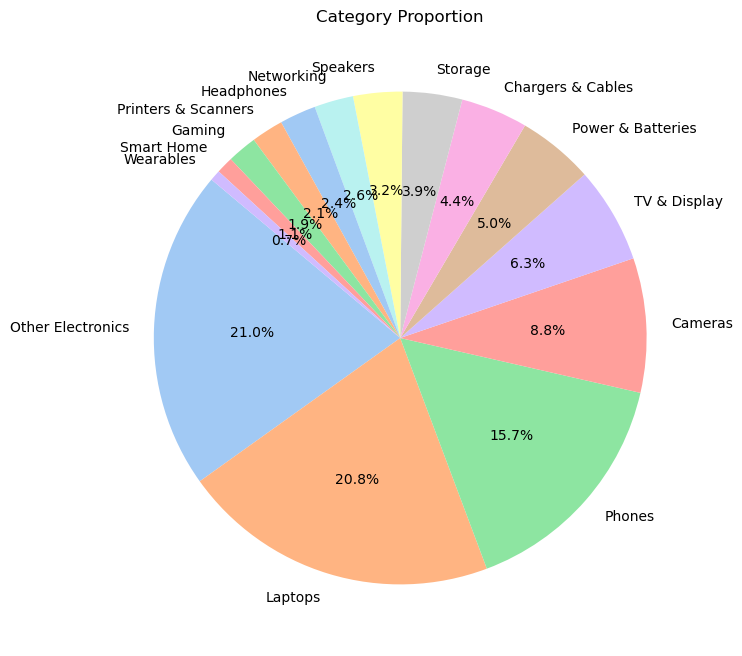

In [34]:
category_counts = df['product_category'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Category Proportion')
plt.show()